<a href="https://colab.research.google.com/github/setthawut8/ai/blob/main/auto_lib/%5Bimage%5D_fastai_superai2_finalHackathon_6to7aug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#lib and install

In [1]:
!gdown 11hyGw_8g7qBhhWYLoTonrriMDjZ9sRFO
!pip install -Uqq fastai
!pip install plotly

Downloading...
From: https://drive.google.com/uc?id=11hyGw_8g7qBhhWYLoTonrriMDjZ9sRFO
To: /content/DataSet.zip
100% 1.16G/1.16G [00:08<00:00, 132MB/s] 
     |████████████████████████████████| 225 kB 5.1 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!unzip '/content/DataSet.zip'
!unzip '/content/DataSet/Image.zip'

!unzip '/content/IM_Test.zip'
!unzip '/content/IM_Train.zip'

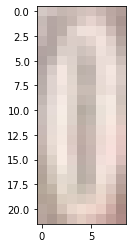

In [3]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

img = "/content/train/0/100.1.png"
img = cv2.imread(img) # reads image
plt.imshow(img)

inspiration: https://towardsdatascience.com/deep-learning-image-classification-with-fast-ai-fc4dc9052106

#data prep

In [5]:
from fastai.vision.all import *

In [6]:
train_path =  Path('/content/train')
test_path =  Path('/content/IM_Test/IM_Test')

In [7]:
len(get_image_files(train_path)), len(get_image_files(test_path))

(73257, 13068)

In [8]:
#define labels
image_dir_path = train_path
image_categories = os.listdir(image_dir_path)
print(image_categories)

['9', '5', '6', '2', '7', '4', '1', '8', '3', '0']


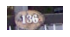

In [9]:
looking_image_path = '/content/IM_Test/IM_Test/'
img = PILImage.create(looking_image_path+'13066.png')
img.show();

In [10]:
df_test=pd.read_json('/content/IM_Test/IM_Test.json')
df_test.head()

,filename,bboxes
0,1.png,"[{'bbox_id': 0, 'x1': 43, 'x2': 62, 'y1': 7, 'y2': 37}]"
1,2.png,"[{'bbox_id': 0, 'x1': 99, 'x2': 113, 'y1': 5, 'y2': 28}, {'bbox_id': 1, 'x1': 114, 'x2': 122, 'y1': 8, 'y2': 31}, {'bbox_id': 2, 'x1': 121, 'x2': 133, 'y1': 6, 'y2': 29}]"
2,3.png,"[{'bbox_id': 0, 'x1': 61, 'x2': 72, 'y1': 6, 'y2': 22}]"
3,4.png,"[{'bbox_id': 0, 'x1': 32, 'x2': 46, 'y1': 6, 'y2': 23}]"
4,5.png,"[{'bbox_id': 0, 'x1': 97, 'x2': 116, 'y1': 28, 'y2': 56}]"


In [11]:
#see the data distribution from path
#define labels
train_path =  Path('/content/train')
image_dir_path = train_path
image_categories = os.listdir(image_dir_path)
print(image_categories)


cat_arr = []
num_arr = []

for cat in image_categories:
  file_numbers = len(os.listdir('/content/train/'+cat))
  cat_arr.append(cat)
  num_arr.append(file_numbers)
  print(cat+": ", file_numbers)

['9', '5', '6', '2', '7', '4', '1', '8', '3', '0']
9:  4659
5:  6882
6:  5727
2:  10585
7:  5595
4:  7458
1:  13861
8:  5045
3:  8497
0:  4948


In [12]:
import pandas as pd
d = {'label': cat_arr, 'file num': num_arr}

df_num = pd.DataFrame(d)

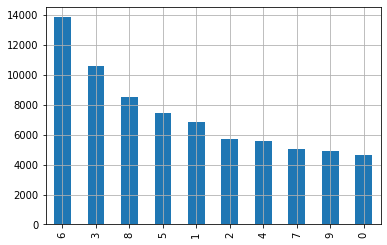

In [13]:
df_num['file num'].sort_values(ascending=False).plot(kind='bar',grid=True)

In [14]:
# #delete file in a folder based on png files
# import os
# path = '/content/train/'
# for file in os.listdir(path):
#   if file.endswith('.png'):
#     os.remove(path+file)

# # delete folder
# import shutil

# shutil.rmtree(path)

# # download train files
# !unzip '/content/IM_Train.zip'

In [15]:
#change file names for fastai
for img in get_image_files(train_path): 
  label_for_path = str(img.parent).split("/")[3]
  img.rename(f"{img.parent}/{label_for_path}-{img.name}")

In [16]:
#test the function
def GetLabel(fileName):
 return fileName.split('-')[0]

GetLabel("3-1000.jpg")

'3'

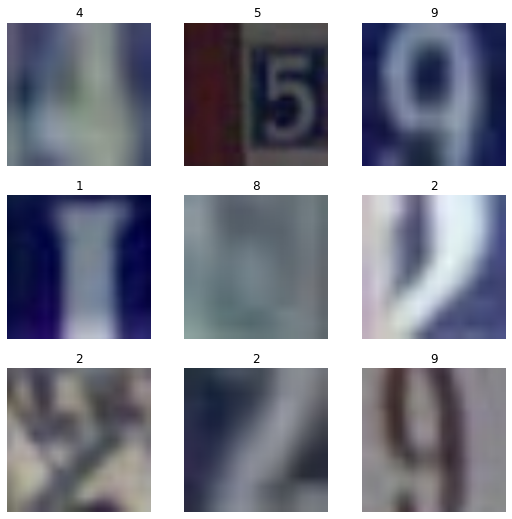

In [17]:
dls = ImageDataLoaders.from_name_func(
    train_path, get_image_files(train_path), valid_pct=0.2, seed=42,
    label_func=GetLabel, item_tfms=Resize(224))

dls.train.show_batch()

# Use the path option to specify the location of the downloaded and extracted data.
# Use the get_image_ files function to collect all file names from the specified location.
# Use an 80–20 split for the dataset.
# Extract labels from file names using the GetLabel function.
# Resize all images to the same size, i.e., 224 pixels.
# Use the show_batch function to generate an output window displaying a grid of training images with assigned labels.

#learn

In [18]:
learn = vision_learner(dls, resnet34, metrics=accuracy, pretrained=True)
learn.fine_tune(epochs=100, cbs=EarlyStoppingCallback(monitor='accuracy', patience=1))

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,time
0,1.706371,1.362594,0.535117,02:21


epoch,train_loss,valid_loss,accuracy,time
0,0.889932,0.647543,0.791072,03:00
1,0.729130,0.544225,0.820900,02:58
2,0.610377,0.493115,0.841444,02:58
3,0.583616,0.478469,0.847997,02:58
4,0.550615,0.454683,0.856938,02:58
5,0.507932,0.442209,0.859737,02:58
6,0.487865,0.444358,0.860624,02:58
7,0.475031,0.441806,0.863491,02:58
8,0.428786,0.450635,0.859805,02:57


No improvement since epoch 7: early stopping


In [19]:
#save fastai model
learn.path = Path('/content/')
#check data path > learn.path or learn.data.path
learn.export('IM_fastai.pkl')

In [20]:
from google.colab import files
files.download('IM_fastai.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [21]:
# #load fastai model
# temp_path = Path('.')
# learn = load_learner(os.path.join(temp_path, 'IM_fastai.pkl'))

#predict

In [22]:
!gdown 1-Gg_uZj10al72YMobsdaX_pWDDZTNDIz
!gdown 1WJEqjMrH57fQbio3hEOiKfsw2YfHzGfK

Downloading...
From: https://drive.google.com/uc?id=1-Gg_uZj10al72YMobsdaX_pWDDZTNDIz
To: /content/digit_test_cropped.zip
100% 30.0M/30.0M [00:00<00:00, 85.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1WJEqjMrH57fQbio3hEOiKfsw2YfHzGfK
To: /content/IM_Submit.csv
100% 238k/238k [00:00<00:00, 98.5MB/s]


In [ ]:
!unzip '/content/digit_test_cropped.zip'

In [24]:
test = pd.read_csv('/content/IM_Submit.csv')
test.head(3)

,imageid_boxid,class
0,1_0,NaN
1,2_0,NaN
2,2_1,NaN


In [25]:
test['imageid_boxid'][0]

'1_0'

5


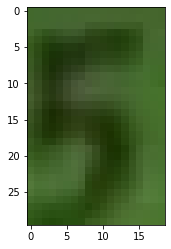

In [26]:
label = learn.predict('/content/test_cropped/1_0.png')[0]
print(label)

img = "/content/test_cropped/1_0.png"
img = cv2.imread(img) # reads image
plt.imshow(img)

In [ ]:
from tqdm import tqdm
#get image name and label at the same time
test_path = '/content/test_cropped/'

img_name = []
labels = []
prediction = {'imageid_boxid': [], 'class': []}

for img in tqdm(os.listdir(test_path)):
  label = learn.predict(test_path+img)

  prediction['imageid_boxid'].append(img[:len(img)-4])
  prediction['class'].append(label[0])

In [73]:
pred_df = pd.DataFrame(prediction)
submission = pd.merge(test, pred_df, on='imageid_boxid', how='left')

submission = submission.drop(['class_x'],axis=1)
submission = submission.rename(columns={"class_y": "class"})
submission.head(5)

,imageid_boxid,class
0,1_0,5
1,2_0,2
2,2_1,1
3,2_2,0
4,3_0,6


('6', TensorBase(6), TensorBase([0.0368, 0.0020, 0.0449, 0.0078, 0.0033, 0.0750, 0.7822, 0.0049,
            0.0138, 0.0293]))


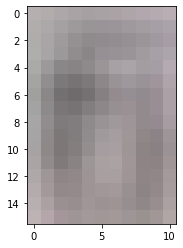

In [74]:
img_file = '3_0'
print(learn.predict('/content/test_cropped/'+img_file+'.png'))

img = cv2.imread('/content/test_cropped/'+img_file+'.png') # reads image
plt.imshow(img)

In [71]:
file_csv_name = 'fastai_IM_new.csv'
submission.to_csv(file_csv_name, index=False)
pred_df.shape, test.shape

In [72]:
from google.colab import files
files.download(file_csv_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>